# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The default simulation is pretty uninteresting, since the Smartcab does not move at all during the simulation. The Smartcab receives a small positive reward for not moving when the light it's at is red, but it gets a larger negative reward (or penalty) for not moving at a green light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* There are 13 flags available to set in `agent.py`. A few of the flags available are:
    - `num_dummies` controls the number of dummy (non-agent) vehicles in the environment.
    - `alpha` is the initial value for the learning rate parameter in the Q-Learning algorithm.
    - `update_delay` is the number of seconds to wait before updating the state of the simulation -- effectively, the length of each simulation cycle.
* The `act()` class method of the `Environment` class is called when an agent performs an action.
* In `simulator.py`, `render()` renders the current state of the simulation to the screen via pygame, whereas `render_text()` renders a condensed version of the current state of the simulation (focusing on the primary agent) to the console.
* In the `planner.py` file, the `next_waypoint()` function considers East-West moves before North-South moves.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


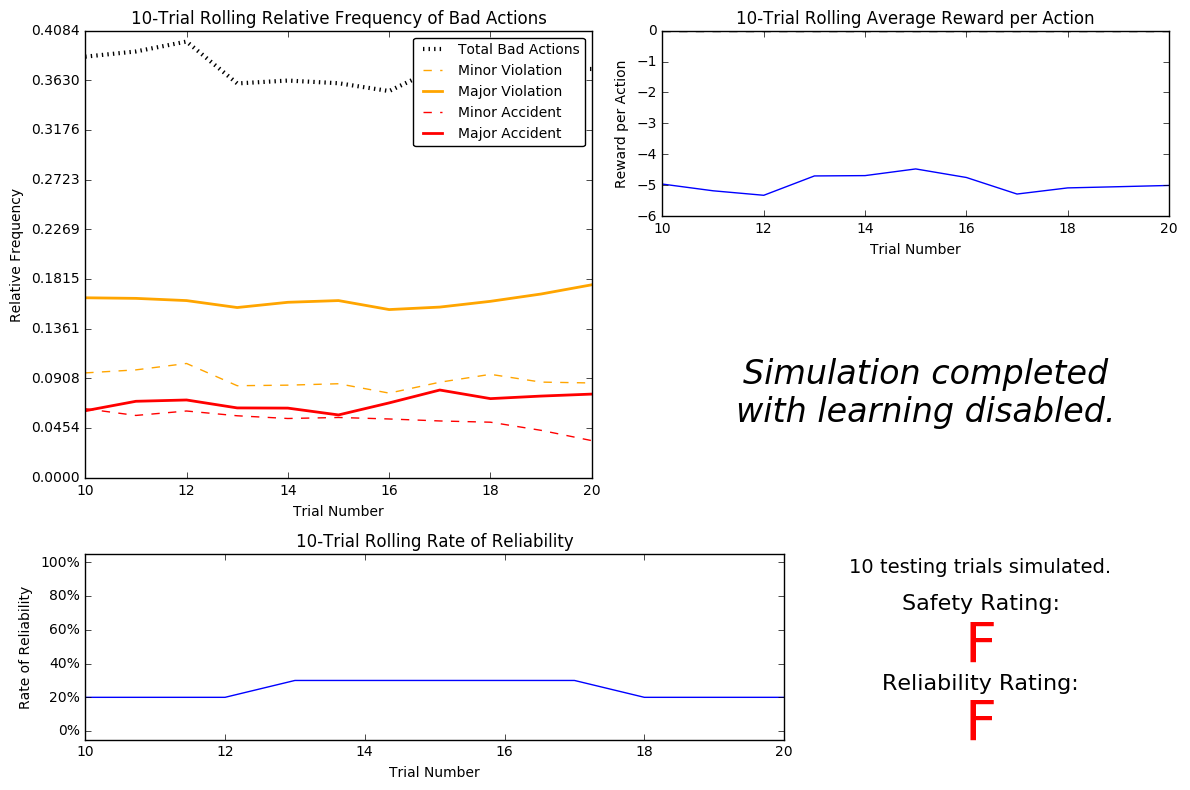

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The agent is making bad (illegal) actions 35-40% of the time; more than a quarter of the time, these bad actions lead to accidents, for a net accident rate of greater than 10%. This result is pretty well expected, given the setup of the environment. There's a 50% chance that any light will be red, and a 50% chance that it will be green. Given that the light is green, 2 out of 4 actions are always non-bad, and 1 action may be non-bad; given that the light is red, 1 action is always non-bad, and 1 action may be non-bad. This implies that the average rate of bad actions should be somewhere between 25% and 50% in the long run.

The average reward per action hovers around -5. This is pretty strong evidence that the learner is consistently being penalized heavily for its poor decisions. The average rate of reliability hovers around 20%, which is very poor.

None of the metrics change significantly across successive trials, which is entirely to be expected, as the behavior of the primary agent doesn't change at all from trial to trial.

Neither the safety nor the reliability record of this car is remotely acceptable for use in the real world. Crashing at more than 10% of intersection and reaching its destination 20% of the time is incredibly poor performance.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

The most relevant features here are `waypoint`, `light`, `oncoming`, and `left`. The relevance of each of these features is discussed below:
* `waypoint` is relevant for efficiency. If the smartcab makes a wrong turn, then it will be less likely to reach the destination in time.
* `light` is relevant for safety. The set of safe actions when the light is red is much smaller than the set of safe actions when the light is green.
* `oncoming` is relevant for safety in some circumstances. When the light is green and the car wishes to turn left, the car may only do so if there are no oncoming cars going straight or turning right.
* `left` is relevant for safety in some other circumstances. When the light is red and the car wishes to turn right, the car may only do so if there are no cars to the left going straight.

Neither `right` nor `deadline` is worth including the state provided to the agent. It turns out that `right` never affects the safety/legality of any maneuver by the primary agent, and `deadline` is irrelevant for efficiency, as the most efficient route is invariant to the amount of time remaining. Furthermore, the way the reward function is set up, it's never possible to get a net gain in expected reward by running a red light when the deadline is near, and this is a good thing!

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

The total size of the state space `('waypoint', 'light', 'oncoming', 'left')` is the Cartesian product of the sets $\{left, forward, right\} \times \{green, red\} \times \{None, left, forward, right\} \times \{None, left, forward, right\}$. Therfore, there are $3 \cdot 2 \cdot 4 \cdot 4 = 96$ elements in the state space.

Of course, we would like the learner to have a chance to try each of the four legal actions for each value of the state space, which is a minimum of 384 individual simulation steps. At an average of 25 steps per simulation, this yields a lower bound of about 16 simulations for a learner to have a non-zero chance seeing a reward from every possible combination of state and action at least once.

Of course, this is only a lower bound; I'll have a lot more to say about training parameter and metaparameter settings later on. However, at first blush, it seems that this state space is small enough to be manageable.

As an aside, the setup of the above question implies that Q-learners are restricted to near-trivially small state/action spaces, which would severely restrict their real-world utility. For example, in our current framework, we can't handle any continuous elements in the state or action vectors -- for example, if we were working on an actual car, we wouldn't be able to handle steering wheel angle as a continuous variable. Of course, the problem of estimating the structure of a function from a sparse set of observations is exactly what supervised learning is all about, so I'm sure there's an interesting body of literature on incorporating supervised learners into the estimation of the Q-function to generalize observations. I intend to read up on it as soon as this project is over.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

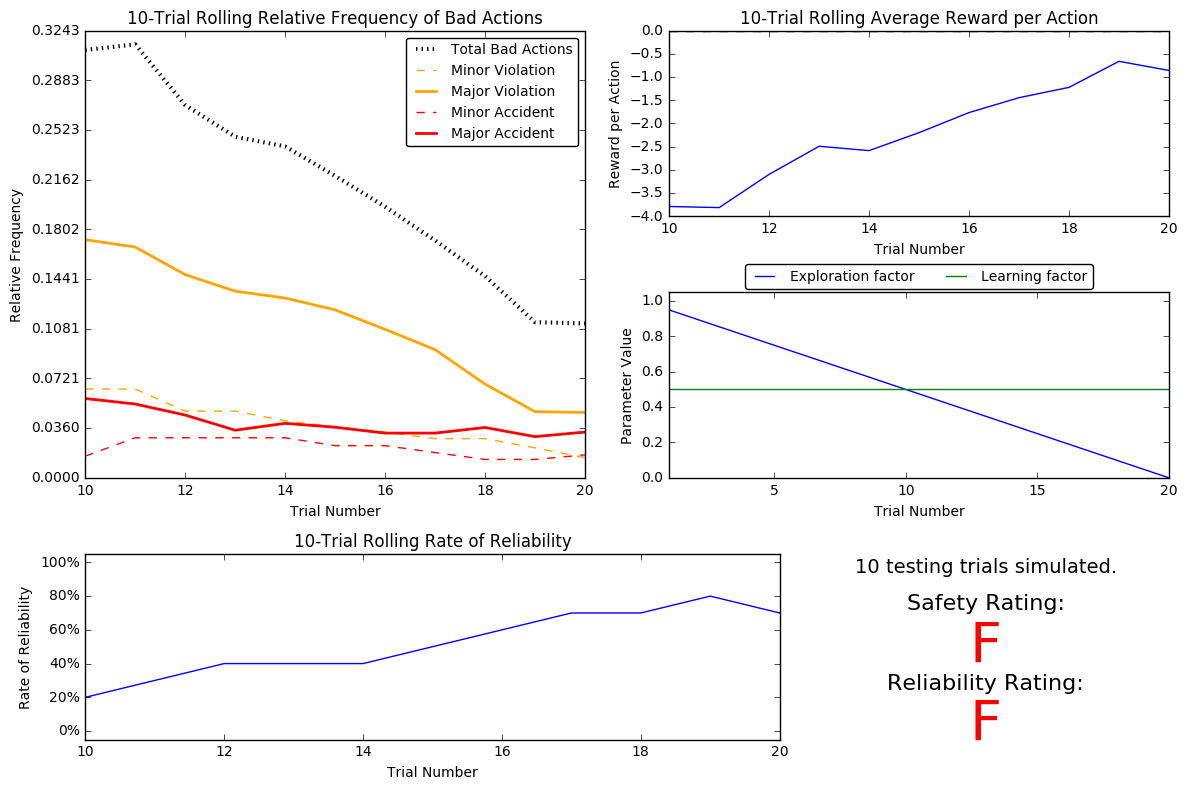

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

First, to clear something up: **this model is not a Q-Learner**. Technically, in some small sense, this model a Q-Learner in the sense that finding the global mean is a degenerate case of OLS, or that [John Cage's 4'33"](https://en.wikipedia.org/wiki/4%E2%80%B233%E2%80%B3) is a piece of music, or that there's a [recipe for ice](http://www.food.com/recipe/ice-cubes-420398) -- it technically counts as a member of the category, but it's missing everything that makes the category genuinely interesting and useful. By eliminating the expectation of future rewards from the update expression, this turns the Q-learner model into a simple exponentially weighted mean of the immediate rewards for any (state, action) pair, which is much less interesting than a full Q-learner. I'll have more to say about this in the response to Question 9.

The default "Q-learner" improved its performance somewhat over the course of the traning iterations. The average rate of bad actions declined from about 30% to about 10%, and the average number of accidents declined slightly as well. The average rolling reward for each action increased from about -4 to about -1, and the rate of reliability increased from about 20% to about 70%. For each of these metrics, the values they started at were approximately equal to the values of the random agent, which makes sense, because the initial overall state of the agent in this simulation was random as well.

The performance of this agent improved over the course of the training trials for two reasons. First, as the number of trials increased, the agent got a better and better idea of which actions were optimal in which states. Second, since $\epsilon$ is decreasing as a function of the number of trials, the primary agent picks (what it thinks is) the optimal action more and more of the time, and choosing random actions less.

The simulation ran for 20 training trials before shifting to testing mode, as expected. Since $\epsilon$ is given by $\epsilon = 1 - 0.05t$, solving for $t$ yields $t = 20(1 - \epsilon)$. Plugging in 0.05 for $\epsilon$ yields 19; adding 1 for fencepost errors yields 20 training trials, as we saw. The value of $\epsilon$ as a function of the number of training trials is precisely the linear function we would expect; $\alpha$ is static, as intended.

Despite all of these improvements over the random agent, this agent still gets grades of F for both safety and reliability. Clearly, much more improvement is needed before the agent is ready for production use.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

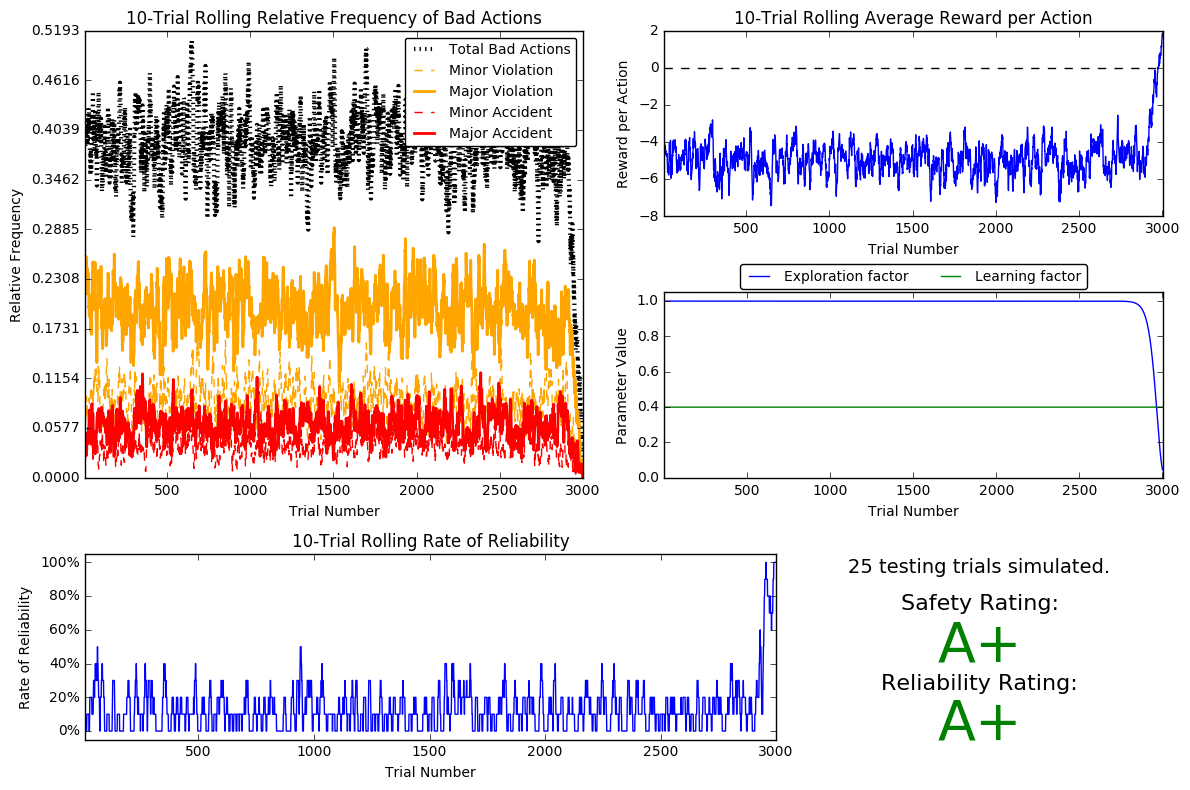

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

Again, **this is not a Q-Learner.** This assignment is equivalent to billing a project as dealing with neural networks, then making students fit logistic regressions. **COME ON!**

Given the model structure we're straitjacketed into, the reward structure of the environment, and the optimal strategy we're trying to get the agent to learn, how should we set up the training environment to give our agent the best shot of learning the optimal strategy in the least amount of time?

First off, our agent is completely unable to generalize strategies across similar states, so we want our agent to have a chance to try every action with every state at least once. If the agent sees a state $n$ times and tries a random action each time, what is the probability $p$ that at least one of $k$ actions will not have been tried? For large $n$, the answer is roughly $p = \frac{(k-1)^n}{k^{n-1}}$; for $k = 4$, $n = 20$ gives a 99% chance that every action will be tried at least once. If every state shows up with approximately equal frequency, this means we would need about 2000 events, or about 80 trials. However, the states are definitely $not$ equally distributed. I added a parameter called `Q_freq` to the `Agent`class to count the number of times the primary agent sees each state, and printed `Q_freq` at the end of each simulation. Running the simulation for 1000 trials showed a very uneven distribution of states, with the rarest state showing up only 6 times! This implies that we'd need to run the simulation for about 3000 trials to be reasonably sure that the agent has gotten feedback from every state/action pair at least once. 3000 training trials on my laptop takes about half an hour, so this is just inside the limits of my patience.

Given the number of training trials, how should we set $\epsilon$ and $\alpha$? In this case, $\epsilon$ is pretty easy. There are really only two reasons to lower epsilon over the course of a training run. First, as $\epsilon$ is lowered, we get a better estimate of the true long-term value of any state, as each set of agent actions is more likely to include long chains of optimal actions, thus better reflecting expected future value of any given state. Second, lowering $\epsilon$ gradually brings the performance of the training agent toward the performance of the optimal agent, which can let us monitoring training performance in real time to see how well our agent is learning. In this case, we're completely chucking out the future rewards term, so the first reason is moot, and the real-time monitoring options in this assignment are severely limited, so the second reason is useless. Thus, in this case, the agent will actual learn more if $\epsilon$ is held as high as possible for as long as possible. Given that we're running 3000 training trials, I could do something cute like set $\epsilon = \min(3000 - t, 1)$, but I'll settle for for a continuous function of $t$ instead and set $\epsilon = 0.05^{(t/3000)^{100}}$, which gives us an $\epsilon$ that stays virtually at 1 for a long time before nosediving for 0 at the very end.

Setting $\alpha$ is a little tricker. Let's focus on the trickiest case, when we only have 20 observations of a state with a green light and figure out the best value of $\alpha$. The green light case is tough, because the expectation of rewards is roughly 2 for going in the correct direction, roughly 1 for making any other legal move (provided there's no oncoming traffic for the left turn), and roughly -5 for standing still. A single observation of each action isn't sufficient because there's random uniform noise, so the sampling distribution of the legal-move rewards overlap. With $\alpha = 1$, this is equivalent to choosing the action with the highest most recent reward -- not ideal. With $\lim_{\alpha \to 0}$, this approximates $\sum{r_i}$ over each action, which favors actions that happen to have been tried more times -- also not ideal. The file `simulate_alpha.py` in the root project directory contains a quick Monte Carlo simulation of the probability that an agent will select the correct action for a given value of $\alpha$; this seemed to suggest that $\alpha = 0.4$ is the best bet.

Thus, we've set the number of trials, the value of $\alpha$, and the function of $\epsilon$ for the agent so that the agent has a fighting chance of learning something *close* to the optimal strategy. (As I'll discuss in Question 8, it's literally impossible for an agent to recover the optimal strategy from the environment's reward function.)

How does the optimized agent perform? Much, much better than the unoptimized agent! Its performance is equal to the random agent for the vast majority of its training run, but this is by design, as $\epsilon$ is held at nearly 1. At the very end of the training run, when $\epsilon$ drops precipitously, reliability shoots up to 100%, violations drop to zero, and expected reward per action shoots up to nearly 2 -- in other words, our agent learned a near-optimal strategy! Over 25 test runs, the agent scored an A+ on both safety and reliability.

**This is still a bad agent**, for reasons I'll discuss in the next answer. The A+ in safety is essentially guaranteed, but I'll freely admit that the A+ in reliability is largely due to luck of the draw on the testing runs. However, this agent represents basically the best we can do given the reward structure of the environment.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

We can define the optimal policy with a few terse requirements:
1. At all costs, avoid all accidents.
2. When taking actions other than `None`, move along the optimal route.
3. Perform the action corresponding to the optimal route whenever safe and legal.

As I'll show, the agent meets the first requirement, but the rewards structure of the environment makes it impossible for *any* learner to meet the second or third requirement.

The second requirement is impossible to meet when the light is green, the optimal route is to the left, and oncoming traffic is going straight or turning right. The best action would be to wait (or really, to go straight if that wouldn't lengthen the overall trip in the hopes that it's easier to turn left at the next light). However, the environment gives the agent a reward of roughly -5 for idling at a green light, regardless of the circumstances. Turning left would cause an accident (which is a reward of roughly -20), whereas making a wrong turn is given a reward of roughly +1. Thus, the agent will randomly choose any wrong legal move in the set of state meeting these critera. I seriously hope this defect in the reward structure is an intentional homage to Derek "I can't turn left" Zoolander...

The third requirement means that the agent should turn right on red whenever possible. However, the agent's rewards for turning right on red (when safe) and staying stopped on red are both roughly +2, so there's no way for the agent to distinguish which action is preferable. This means that any agent can't do better than blindly guessing whether to stop or turn right.

I've written some code to parse the primary agent's policy; let's see how often the agent fails to follow optimal policy.


In [5]:
import analyze_agent

states = analyze_agent.parse_agent()
wrong_turn_states = {state: action for state, action in states.iteritems()
                     if state[0] != action and action != 'None'}
red_wreck_states = {state: action for state, action in states.iteritems()
                    if state[1] == 'red'
                    and not (action == 'None' 
                        or (action == 'right' and state[2] != 'forward'))} 
green_wreck_states = {state: action for state, action in states.iteritems()
                      if state[1] == 'green' and action == 'left'
                      and (state[3] == 'forward' or state[3] == 'right')}
timid_red_states = {state: action for state, action in states.iteritems()
                    if state[0] == 'right' and action != 'right'
                    and state[2] != 'forward'}

print "\nRed Wreck States:"
for state, v in red_wreck_states.iteritems():
    print state, v
print "\nGreen Wreck States:"
for state, v in green_wreck_states.iteritems():
    print state, v
print "\nWrong Turn States:"
for state, action in wrong_turn_states.iteritems():
    print state, action
print "\nTimid Red States:"
for state, action in timid_red_states.iteritems():
    print state, action


Red Wreck States:

Green Wreck States:

Wrong Turn States:
('left', 'green', 'forward', 'forward') forward
('left', 'green', 'right', 'forward') forward
('left', 'green', 'left', 'forward') forward
('left', 'green', 'left', 'right') right
('left', 'green', 'forward', 'right') right
('left', 'green', 'right', 'right') forward
('left', 'green', None, 'right') right
('left', 'green', None, 'forward') right

Timid Red States:
('right', 'red', 'right', 'left') None
('right', 'red', None, 'forward') None
('right', 'red', None, 'right') None
('right', 'red', 'left', 'right') None
('right', 'red', 'left', 'forward') None
('right', 'red', 'right', 'forward') None


We can see that the agent never runs red lights (the "Red Wreck" states), and that it never causes wrecks at green lights (the "Green Wreck" states). However, it takes a wrong turn for each of the eight possible states when the correct turn is left, the light is green, and the oncoming traffic is going forward or right (the "Wrong Turn" states). Fortunately, these are the only states in which it takes a wrong turn!

The agent also fails to turn right on red in 6 of the possible 12 states when the light is red, the correct turn is right, and the traffic to the left is not going forward (the "Timid Red" states). On average, we'd expect to get 6 out of these 12 states right, and we just so happened to get exactly 6 right in this case.

However, these two scenarios ("Timid Red" and "Wrong Turn") are the only cases in which the learner fails to follow optimal policy, so it's doing the optimal action in 82 out of 96 states. Again, this is the best we can expect with the goofy reward function the agent is given.

Here's one quick example of the agent's full set of estimated rewards for a given state:

`('right', 'red', 'right', None)
 -- forward : -12.12
 -- right : 1.81
 -- None : 1.46
 -- left : -10.28
 `
 
Here, the best choice is to turn right on red, which is safe, since the traffic from the left is turning right. The agent's estimated rewards for turning right are 1.81, whereas the estimated rewards for None are 1.46, for left are -10.28, and for forward are -12.12, so the agent will turn right. However, it's easy to see that the estimated rewards from right and None are very close (and we know that they are noisy estimates of the same underlying reward), so it's possible to imagine that given a different training run, the agent may have chosen None as the (incorrect) optimal action.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Why yes, it is **curious** that we're given and assignment on Q-Learning that leaves out the most important part of the algorithm. Given the structure of the simulation (which I'll elaborate on in a second), it's pretty obvious why we're completely ignoring future rewards. The *real* question is why the project we were given had such a dumb reward function associated with it. Heaven forbid that we actually be expected to solve interesting problems!

I'm not sure exactly what you're looking for here, but there's one reason why ignoring future rewards doesn't affect the performance of the agent that much, and one reason why considering future rewards is an actively bad idea.

The reason why future rewards are a *bad idea* here is that there are no rewards or penalties associated with the absorbing states (either reaching the destination or running out of time), and there is a slight positive reward for making any legal move, even if it's a wrong turn with respect to the destination! Therefore, maximizing the expectation of future rewards would encourage the SmartCab to drive safely but aimlessly, and to arrive at the destination at the very last moment (if at all). The rewards structure could be made more realistic by providing a large positive reward (that's proportional to the time remaining) for reaching the destination, and a large negative reward (that's proportiona to the distance from the destination) for running out of time.

The reason why future rewards aren't *necessary* for the agent to figure out where it's going is that the `RoutePlanner` class handles all of the difficulties associated with determining how to get from Point A to Point B. Given that the next turn on the optimal route is effectively part of the state provided to the agent, there is essentially no temporal dependency in the reward function -- the reward at time $t + k$ is never a function of the action taken at time $t$ for any value of $k$, so including future rewards (assuming that we've neutralized the incentive to keep driving forever) would not affect the optimal policy of the agent.

A *much* more interesting problem here would be to include big rewards for absorbing states, remove the `RoutePlanner` object from the environment, and include the position of the destination relative to the agent in the state vector. However, this would significantly increase the space of the state vector, and we'd have to modify the Q-learner to let it generalize actions across similar states -- in other words, we'd have to actually do some fun math.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.